In [1]:
# All necessary imports for this analysis:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import statsmodels.api as sm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
#from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
#from sklearn.linear_model import LinearRegression
from sklearn import tree
plt.style.use('seaborn-whitegrid')

<a id='section1'></a>
## Section 1: Importing the Data
In this section, we import the data and try to understand the dataset. What information is provided and what is missing.

In [2]:
# load the data from the file: winemag-data-130k-v2
df = pd.read_csv('13100781.csv', index_col=0, na_values='\xa0',sep=',')
df.head()

/Users/claramui/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,GEO,DGUID,Case identifier number,Case information,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
REF_DATE,,,,,,,,,,,,,,,
2020,Canada,2016A000011124,1,Region,Number,223,units,0,v1158536291,1.1.1,2,NaN,NaN,NaN,0
2020,Canada,2016A000011124,1,Episode week,Number,223,units,0,v1158536292,1.1.2,19,NaN,NaN,NaN,0
2020,Canada,2016A000011124,1,Episode year,Number,223,units,0,v1158536293,1.1.3,20,NaN,NaN,NaN,0
2020,Canada,2016A000011124,1,Gender,Number,223,units,0,v1158536294,1.1.4,1,NaN,NaN,NaN,0
2020,Canada,2016A000011124,1,Age group,Number,223,units,0,v1158536295,1.1.5,3,NaN,NaN,NaN,0


In [34]:
# Transpose the case information into row
df_data = df.pivot(index = 'Case identifier number', columns = 'Case information', values = 'VALUE')#.reset_index()

In [35]:
# Show the column information
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97058 entries, 1 to 97058
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Age group                     97058 non-null  int64
 1   Asymptomatic                  97058 non-null  int64
 2   Death                         97058 non-null  int64
 3   Episode week                  97058 non-null  int64
 4   Episode year                  97058 non-null  int64
 5   Gender                        97058 non-null  int64
 6   Hospital status               97058 non-null  int64
 7   Occupation                    97058 non-null  int64
 8   Onset week of symptoms        97058 non-null  int64
 9   Onset year of symptoms        97058 non-null  int64
 10  Recovered                     97058 non-null  int64
 11  Recovery week                 97058 non-null  int64
 12  Recovery year                 97058 non-null  int64
 13  Region                        9

In [36]:
df_data.head()

Case information,Age group,Asymptomatic,Death,Episode week,Episode year,Gender,Hospital status,Occupation,Onset week of symptoms,Onset year of symptoms,...,"Symptom, headache","Symptom, irritability","Symptom, nausea","Symptom, other","Symptom, pain","Symptom, runny nose","Symptom, shortness of breath","Symptom, sore throat","Symptom, weakness",Transmission
Case identifier number,,,,,,,,,,,,,,,,,,,,,
1,3,9,9,19,20,1,3,4,19,20,...,9,9,9,9,9,9,9,9,9,1
2,1,9,2,19,20,2,3,4,19,20,...,9,9,9,9,9,9,9,9,9,1
3,8,9,9,16,20,2,3,4,99,99,...,9,9,9,9,9,9,9,9,9,1
4,7,2,2,12,20,2,3,4,12,20,...,1,1,2,9,1,1,1,1,1,1
5,7,9,9,99,20,1,9,4,99,99,...,9,9,9,9,9,9,9,9,9,9


In [39]:
# Show correlation 
df_core = df_data[['Age group','Asymptomatic','Gender', 'Hospital status', 'Occupation','Region', 'Transmission']]
df_core

Case information,Age group,Asymptomatic,Gender,Hospital status,Occupation,Region,Transmission
Case identifier number,,,,,,,
1,3,9,1,3,4,2,1
2,1,9,2,3,4,3,1
3,8,9,2,3,4,2,1
4,7,2,2,3,4,5,1
5,7,9,1,9,4,2,9
...,...,...,...,...,...,...,...
97054,3,9,1,3,4,3,1
97055,7,9,2,9,9,3,1
97056,7,9,2,3,9,4,1


In [43]:
corr = df_core.corr()
corr

Case information,Age group,Asymptomatic,Gender,Hospital status,Occupation,Region,Transmission
Case information,,,,,,,
Age group,1.000000,0.005004,0.032218,0.038265,0.062988,-0.054473,0.046889
Asymptomatic,0.005004,1.000000,0.032350,0.051156,-0.026985,-0.107545,0.030962
Gender,0.032218,0.032350,1.000000,0.036655,-0.091518,-0.044874,0.007527
Hospital status,0.038265,0.051156,0.036655,1.000000,0.149513,-0.149648,0.148598
Occupation,0.062988,-0.026985,-0.091518,0.149513,1.000000,0.391609,0.250795
Region,-0.054473,-0.107545,-0.044874,-0.149648,0.391609,1.000000,0.103405
Transmission,0.046889,0.030962,0.007527,0.148598,0.250795,0.103405,1.000000


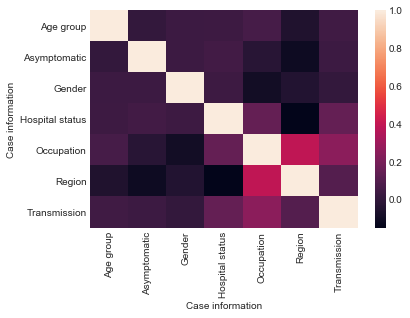

In [44]:
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

<a id='section3'></a>
## Section 3: Dataset Exploratory Analytics
In this section, we explore the dataset to see different trends and correlations between the feature variables. Using this analysis we can more confidently pursue answer our research question for this project. This section contains the following subsections:
1. Age Group - Visualizer  <a href='#section3a'>[LINK]</a>
2. Gender <a href='#section3b'>[LINK]</a>
3. Occupation <a href='#section3c'>[LINK]</a>
4. Asymptomatic <a href='#section3d'>[LINK]</a>
5. Region <a href='#section3e'>[LINK]</a>
6. Transmission <a href='#section3f'>[LINK]</a>

<a id='section3a'></a>
### Section 3A: Age Group

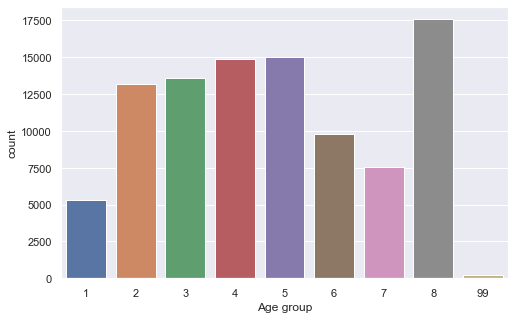

In [46]:
# Count the number of reviews for each point
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(8,5)})

sns.countplot(df_core['Age group'])
None

<a id='section3b'></a>
### Section 3B: Gender

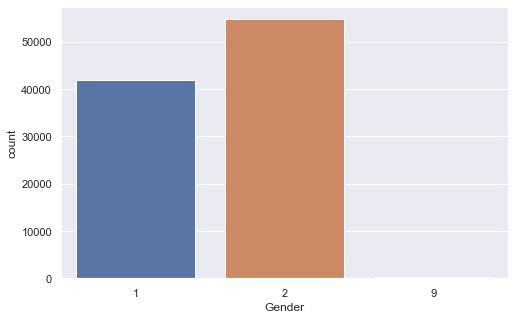

In [48]:
# Count the number of reviews for each point
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(8,5)})

sns.countplot(df_core['Gender'])
None

<a id='section3c'></a>
### Section 3C: Occupation

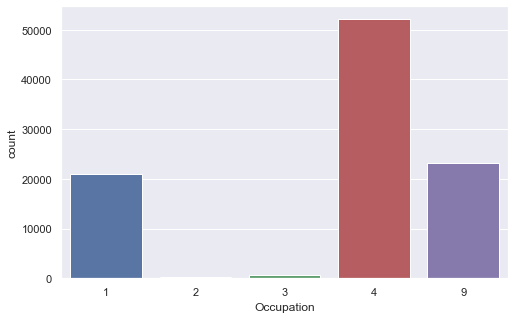

In [49]:
# Count the number of reviews for each point
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(8,5)})

sns.countplot(df_core['Occupation'])
None

In [62]:
df_core.groupby(['Occupation'])['Occupation'].count()

Occupation
1    20891
2      268
3      702
4    52094
9    23103
Name: Occupation, dtype: int64

<a id='section3d'></a>
### Section 3D: Asymptomatic

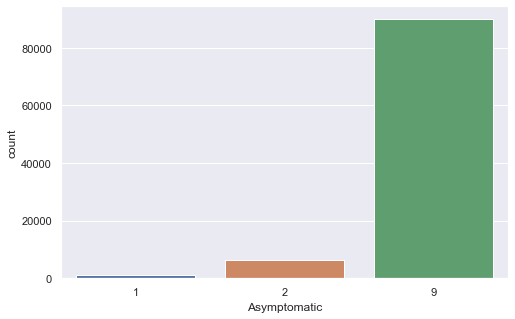

In [50]:
# Count the number of reviews for each point
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(8,5)})

sns.countplot(df_core['Asymptomatic'])
None

In [61]:
df_core.groupby(['Asymptomatic'])['Asymptomatic'].count()

Asymptomatic
1     1015
2     6190
9    89853
Name: Asymptomatic, dtype: int64

<a id='section3e'></a>
### Section 3E: Region

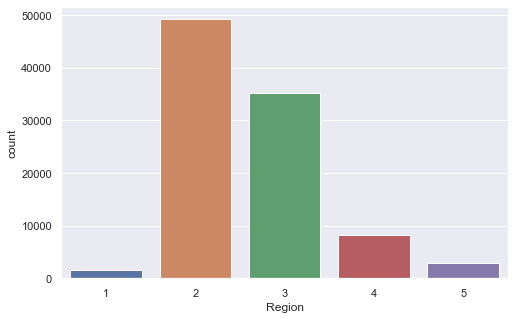

In [63]:
# Quebec -> Ontario
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(8,5)})

sns.countplot(df_core['Region'])
None

<a id='section3f'></a>
### Section 3F: Transmission

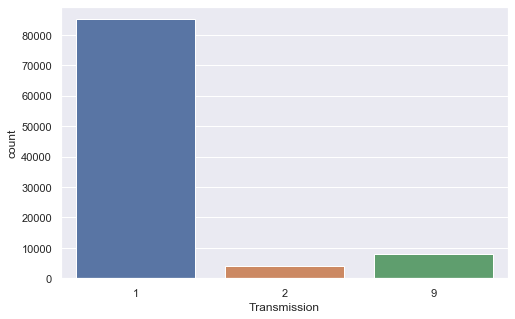

In [64]:
# Count for each transmission
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(8,5)})

sns.countplot(df_core['Transmission'])
None